## Bank Marketing Dataset Analysis

This jupyter notebook performs a analysis of a bank marketing dataset that can be found in the following kaggle link: [**Bank Marketing Dataset**](https://www.kaggle.com/janiobachmann/bank-marketing-dataset).

To enhance the final product of the analysis different other kaggle sources were examined and incorporated. Therefore credit is due to the following authors:
- [Bank Marketing Campaign || Opening a Term Deposit by Janio Martinez Bachmann](https://www.kaggle.com/code/janiobachmann/bank-marketing-campaign-opening-a-term-deposit)
- [Bank Marketing Analysis by Aleksandra Deis](https://www.kaggle.com/code/aleksandradeis/bank-marketing-analysis)
- [Bank Customer Segmentation by Rhythm Shah](https://www.kaggle.com/code/rhythmshah11/bank-customer-segmentation)

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

### Import Data

Before beginning the analysis, let's start by importing the data.

In [161]:
file_path = "bank.csv"
df = pd.read_csv(file_path)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Data Exploration

Once the dataset is imported, the next step is to examine the total number of rows and assess the number of any missing values.
In this dataset, there are no missing values. If missing values were present, we would address them by imputing the median, mean, or mode.

In [162]:
print("Bank marketing dataset consists of {rows} rows.".format(rows = len(df)))
df.describe()

Bank marketing dataset consists of 11162 rows.


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Verify null values

In [163]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

#### Analysis of the response column - deposit 
The response column contains the target variable **deposit**, which we aim to predict. Since this is a **binary classification** problem, the deposit variable has **two possible outcomes**: **'yes'** or **'no'**. The graph below shows that the counts for both binary values are **reasonably close**. As a result, **accuracy is a suitable metric for evaluating the performance of the model**.

<Axes: title={'center': 'Information on Deposit Suscriptions'}, ylabel='count'>

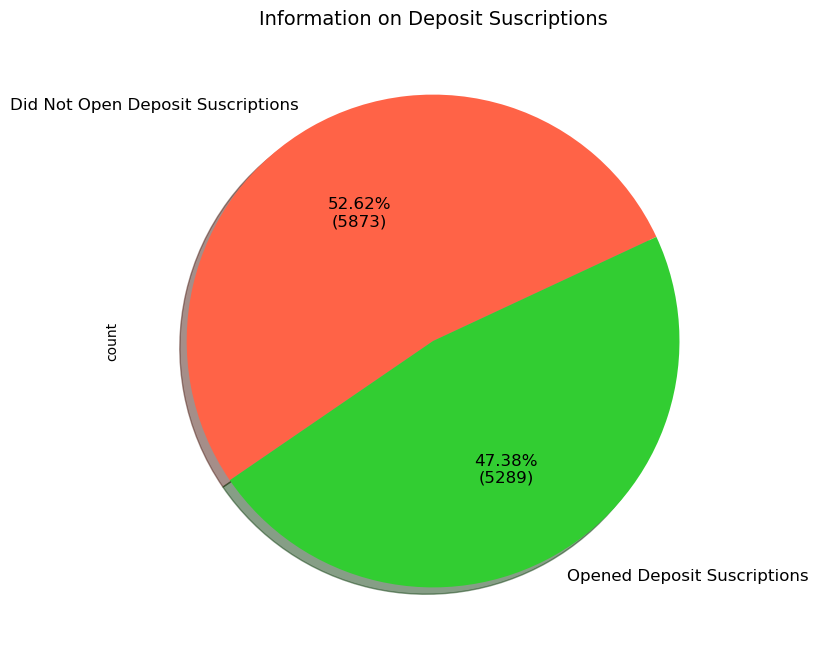

In [164]:
y_counts = df["deposit"].value_counts()
f, ax = plt.subplots(figsize=(8,8))

colors = ["tomato", "limegreen"]
labels ="Did Not Open Deposit Suscriptions", "Opened Deposit Suscriptions"

plt.title('Information on Deposit Suscriptions', fontsize=14)

y_counts.plot.pie(
  autopct=lambda pct: '{:.2f}%\n({})'.format(pct, int(round(pct*sum(y_counts)/100.0))),
  ax=ax, shadow=True, colors=colors, labels=labels, fontsize=12, startangle=25
)

# Adapted of Janio Martinez Bachmann's code

#### Distribution Categorical Columns
The graphs below illustrate the distribution of the categorical variables, leading to the following observations:
- **Job** - The most common occupations are management, blue-collar, and technician, while the least common are unknown, housemaid, and entrepreneur.
- **Marital** - The majority of individuals in the dataset are married, followed by single and divorced individuals.
- **Education** - The most common education level is secondary, followed by tertiary and primary, with a small portion categorized as unknown.
- **Default** - There is a significant imbalance between individuals who do not have credit in default and those who do, with the majority of individuals falling into the "no default" category.
- **Housing** - The distribution between those with and without housing loans is fairly even.
- **Loan** - However, most people do not have a personal loan, with only a small portion marked as “yes”.
- **Contact** - The most frequent contact method is cellular, followed by unknown and telephone.
- **Month** - The majority of last contacts occurred in May, followed by July and August. March had the fewest contacts.
- **Poutcome** - The outcome of most previous marketing campaigns is unknown. Among the known outcomes, failure is the most common.

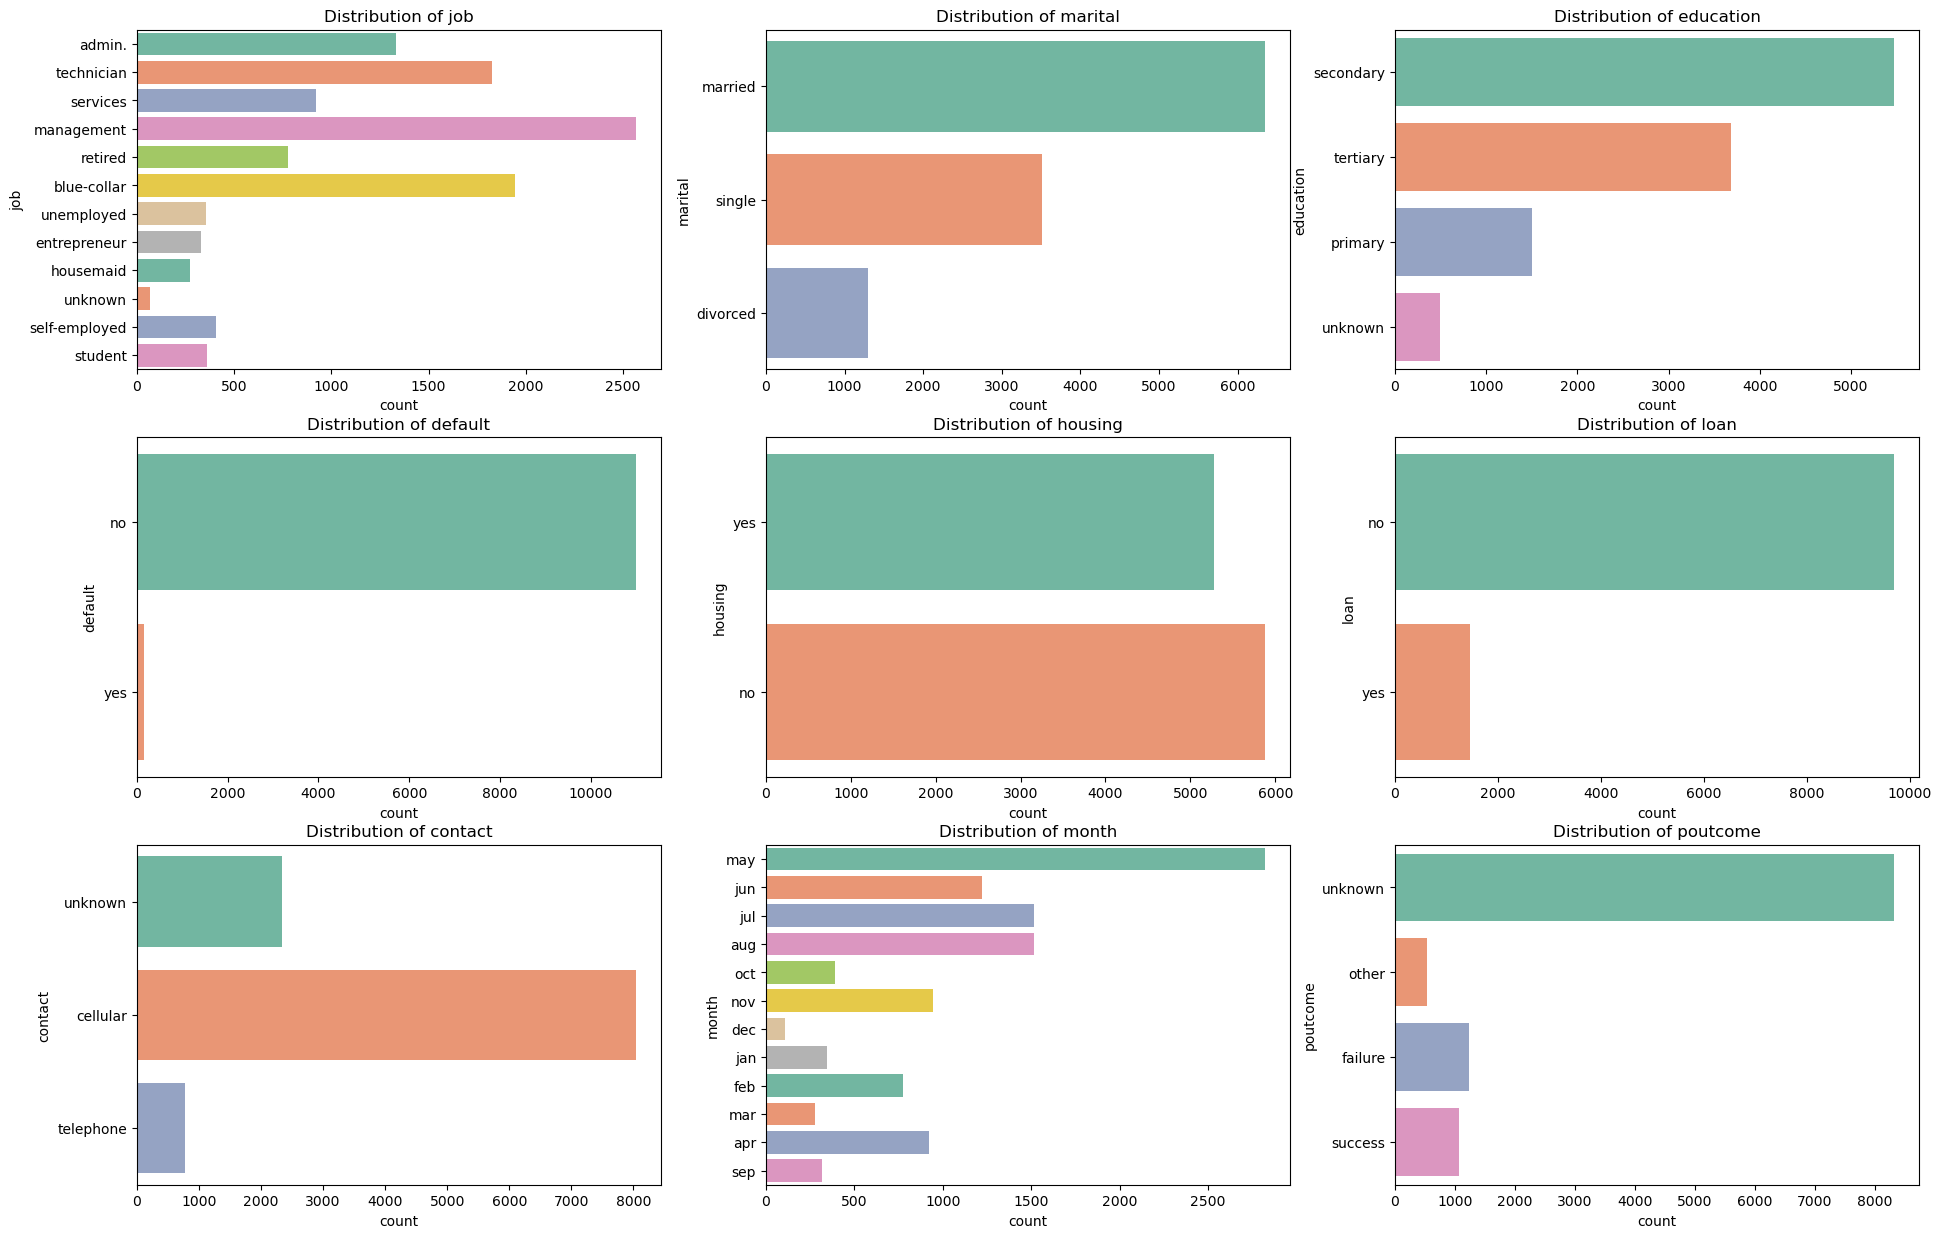

In [165]:
categorical_columns = df.columns[df.dtypes == 'object']
categorical_columns = categorical_columns.drop("deposit")

fig, ax = plt.subplots(3, 3, figsize=(23, 15))
for variable, subplot in zip(categorical_columns, ax.flatten()):
  sns.countplot(y=df[variable], ax=subplot, hue=df[variable], palette="Set2", legend=False)
  subplot.set_title(f"Distribution of {variable}")

#### Categorical features against the response column

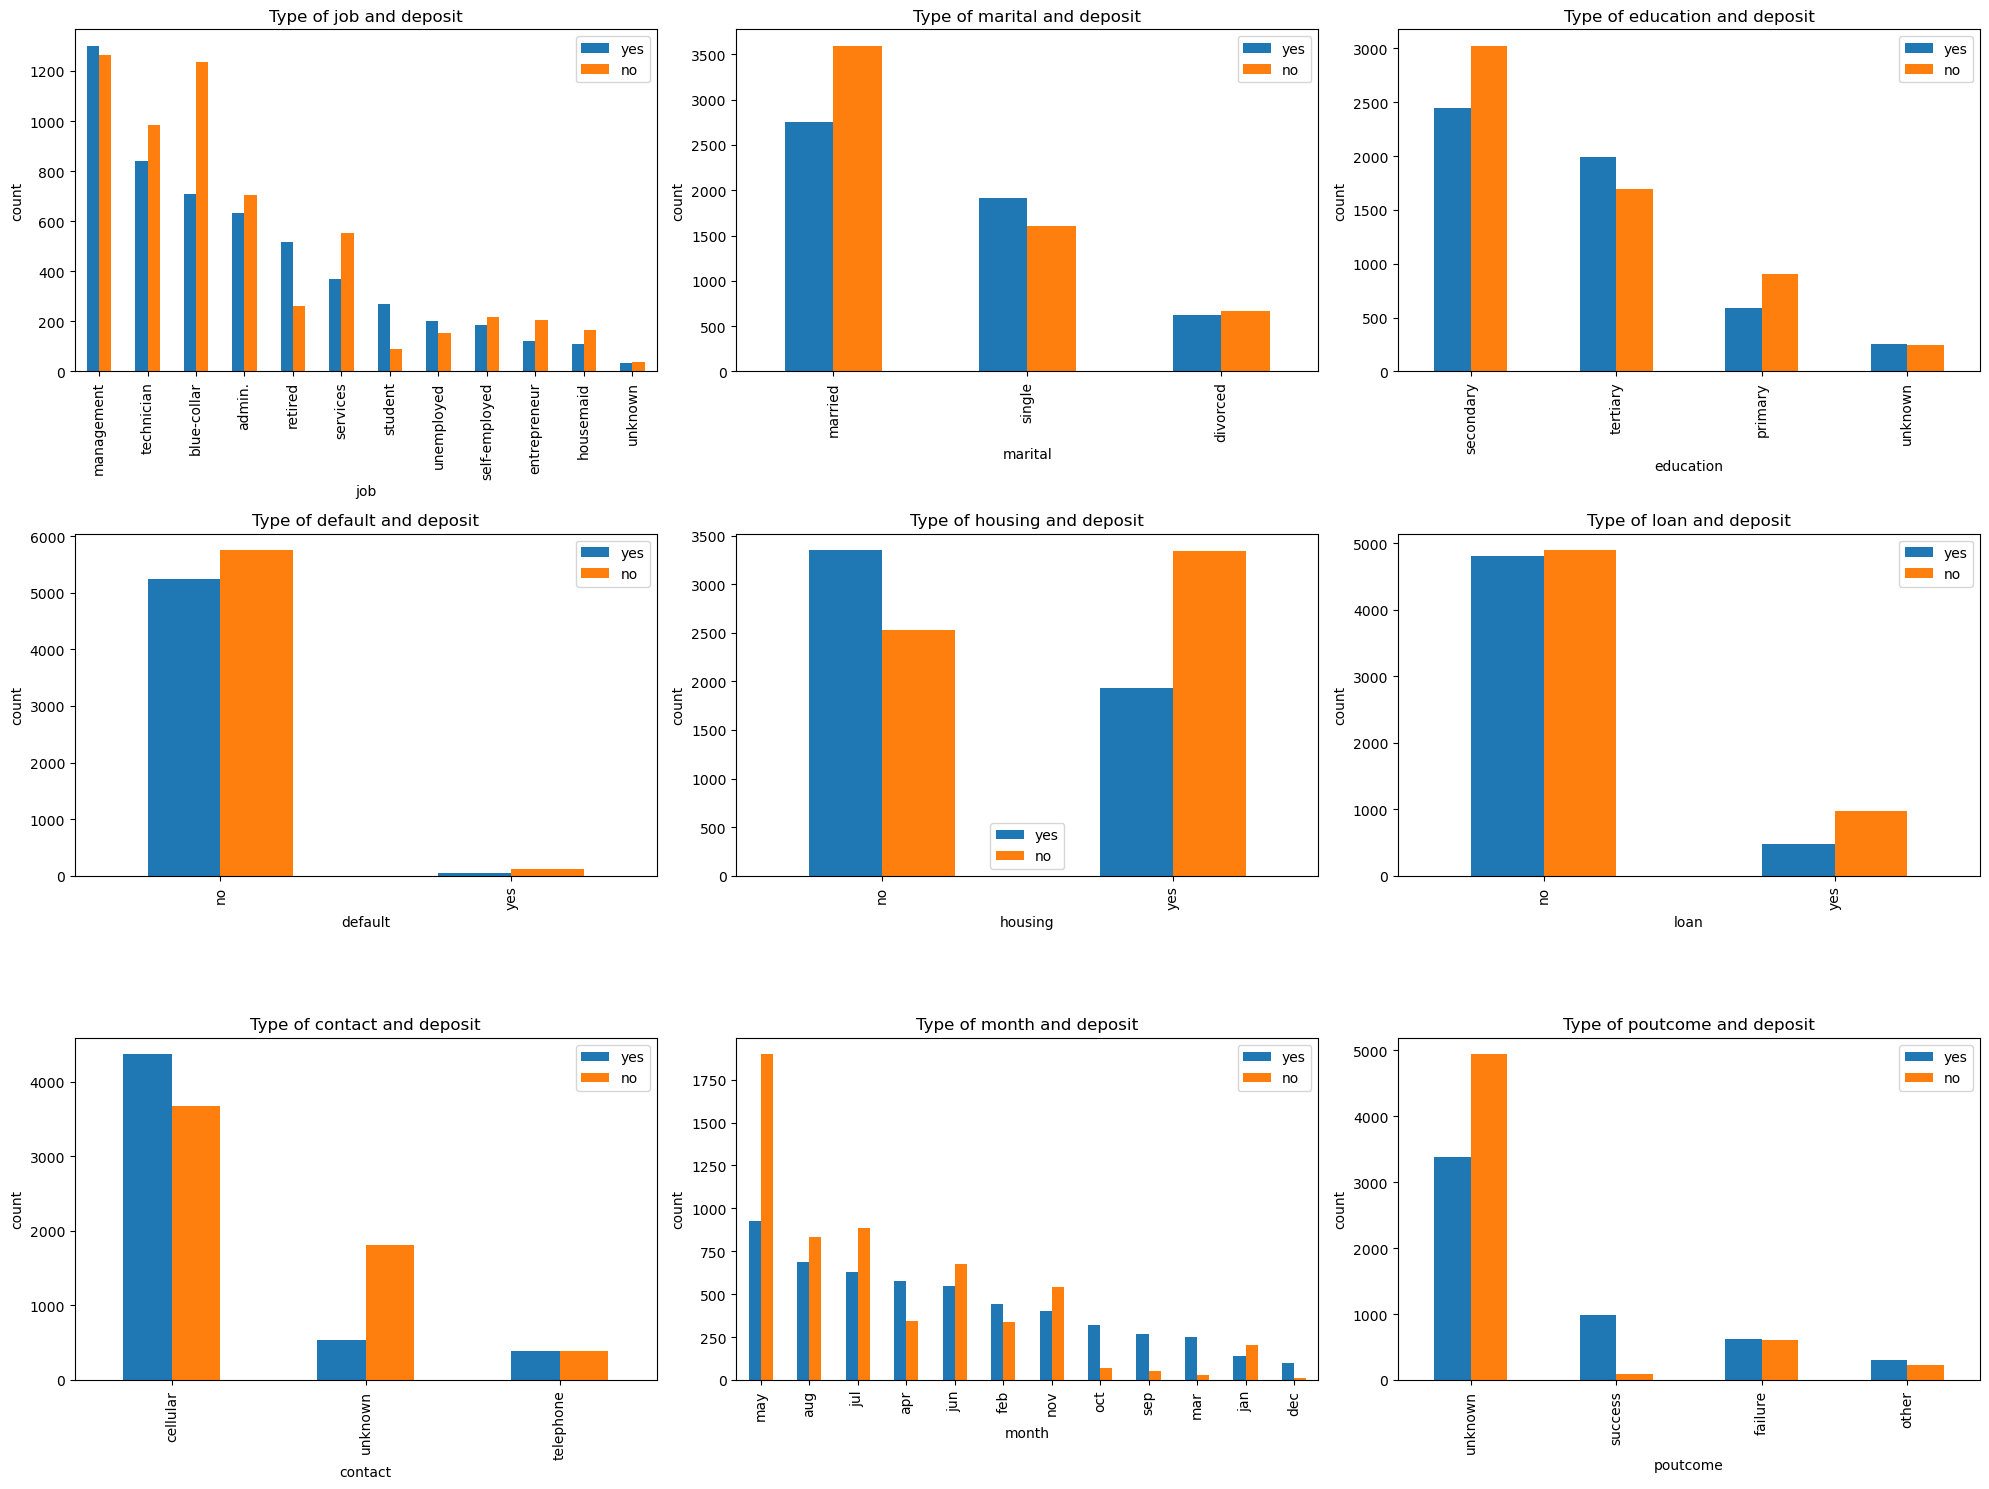

In [166]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(categorical_columns):
  j_df = pd.DataFrame()
  j_df['yes'] = df[df['deposit'] == 'yes'][feature].value_counts()
  j_df['no'] = df[df['deposit'] == 'no'][feature].value_counts()
  j_df.plot.bar(ax=axes[i], title=f'Type of {feature} and deposit')
  axes[i].set_ylabel('count')

plt.tight_layout()


#### Distribution Numeric Columns
The charts below illustrate the distribution of numerical data in the dataset. Upon analyzing each chart, the following observations can be made relative to each of the variables:

- **Age** - Most people are between 20 and 40 years old, with a peak around 30. The distribution skews slightly right, with a few individuals up to around 90 years.
- **Balance** - heavily skewed towards low values, with most clients having minimal or no balance.
- **Day** - has a uniform distribution, meaning that the calls were distributed evenly throughout the month.
- **Duration** - exhibits a right-skewed distribution heavily concentrated around 0, indicating that most contacts were of short duration.
- **Campaign** - Most clients have been contacted less than 5 times, being unusual for a person to be contacted more than 10 times.
- **Pdays** - The pdays variable, indicating the number of days since a person was last contacted in a previous campaign, indicates that most clients were either never contacted or contacted recently, with the majority of values clustered around 0.
- **Previous** - The previous variable is also concentrated around 0, with a rapid decrease as the number of prior contacts rises, meaning that most clients had not been contacted before.

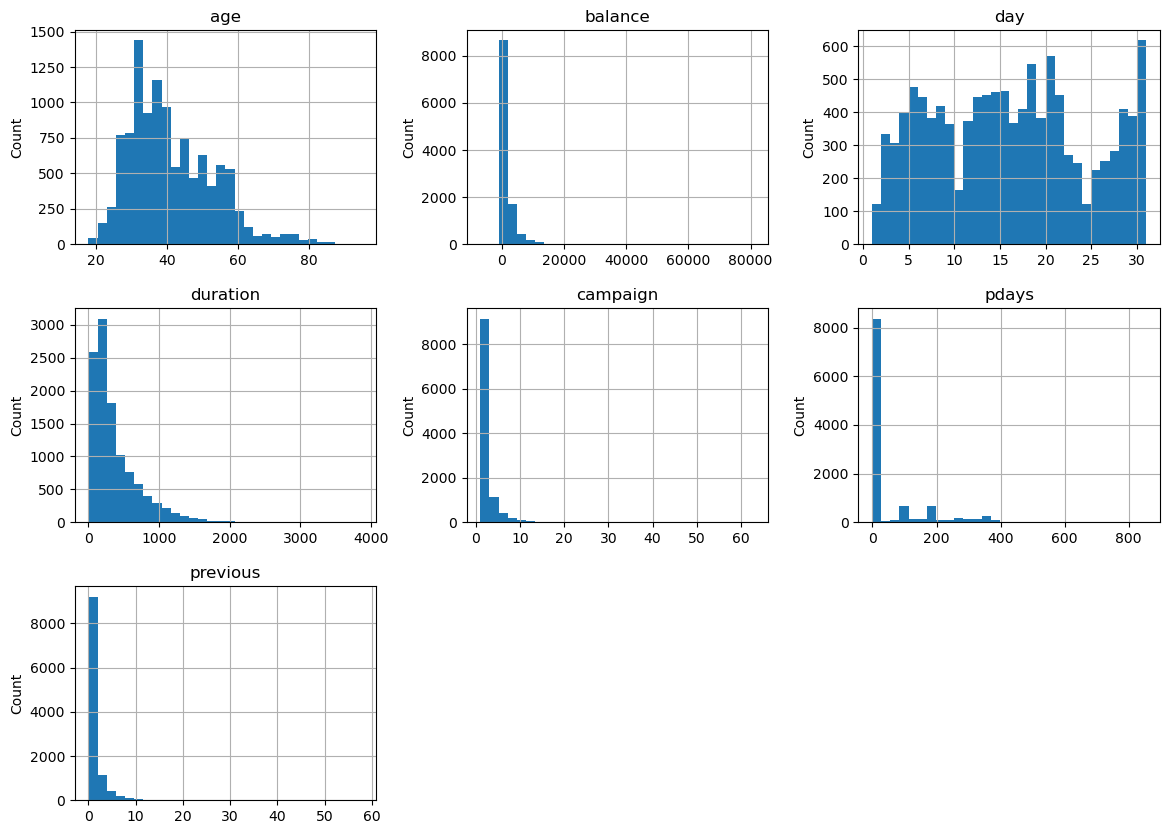

In [167]:
# Distribution Numerical Data
axes = df.hist(bins=30, figsize=(14,10))
for ax in axes.flatten():
  ax.set_ylabel("Count")

#### Numerical features against the response column

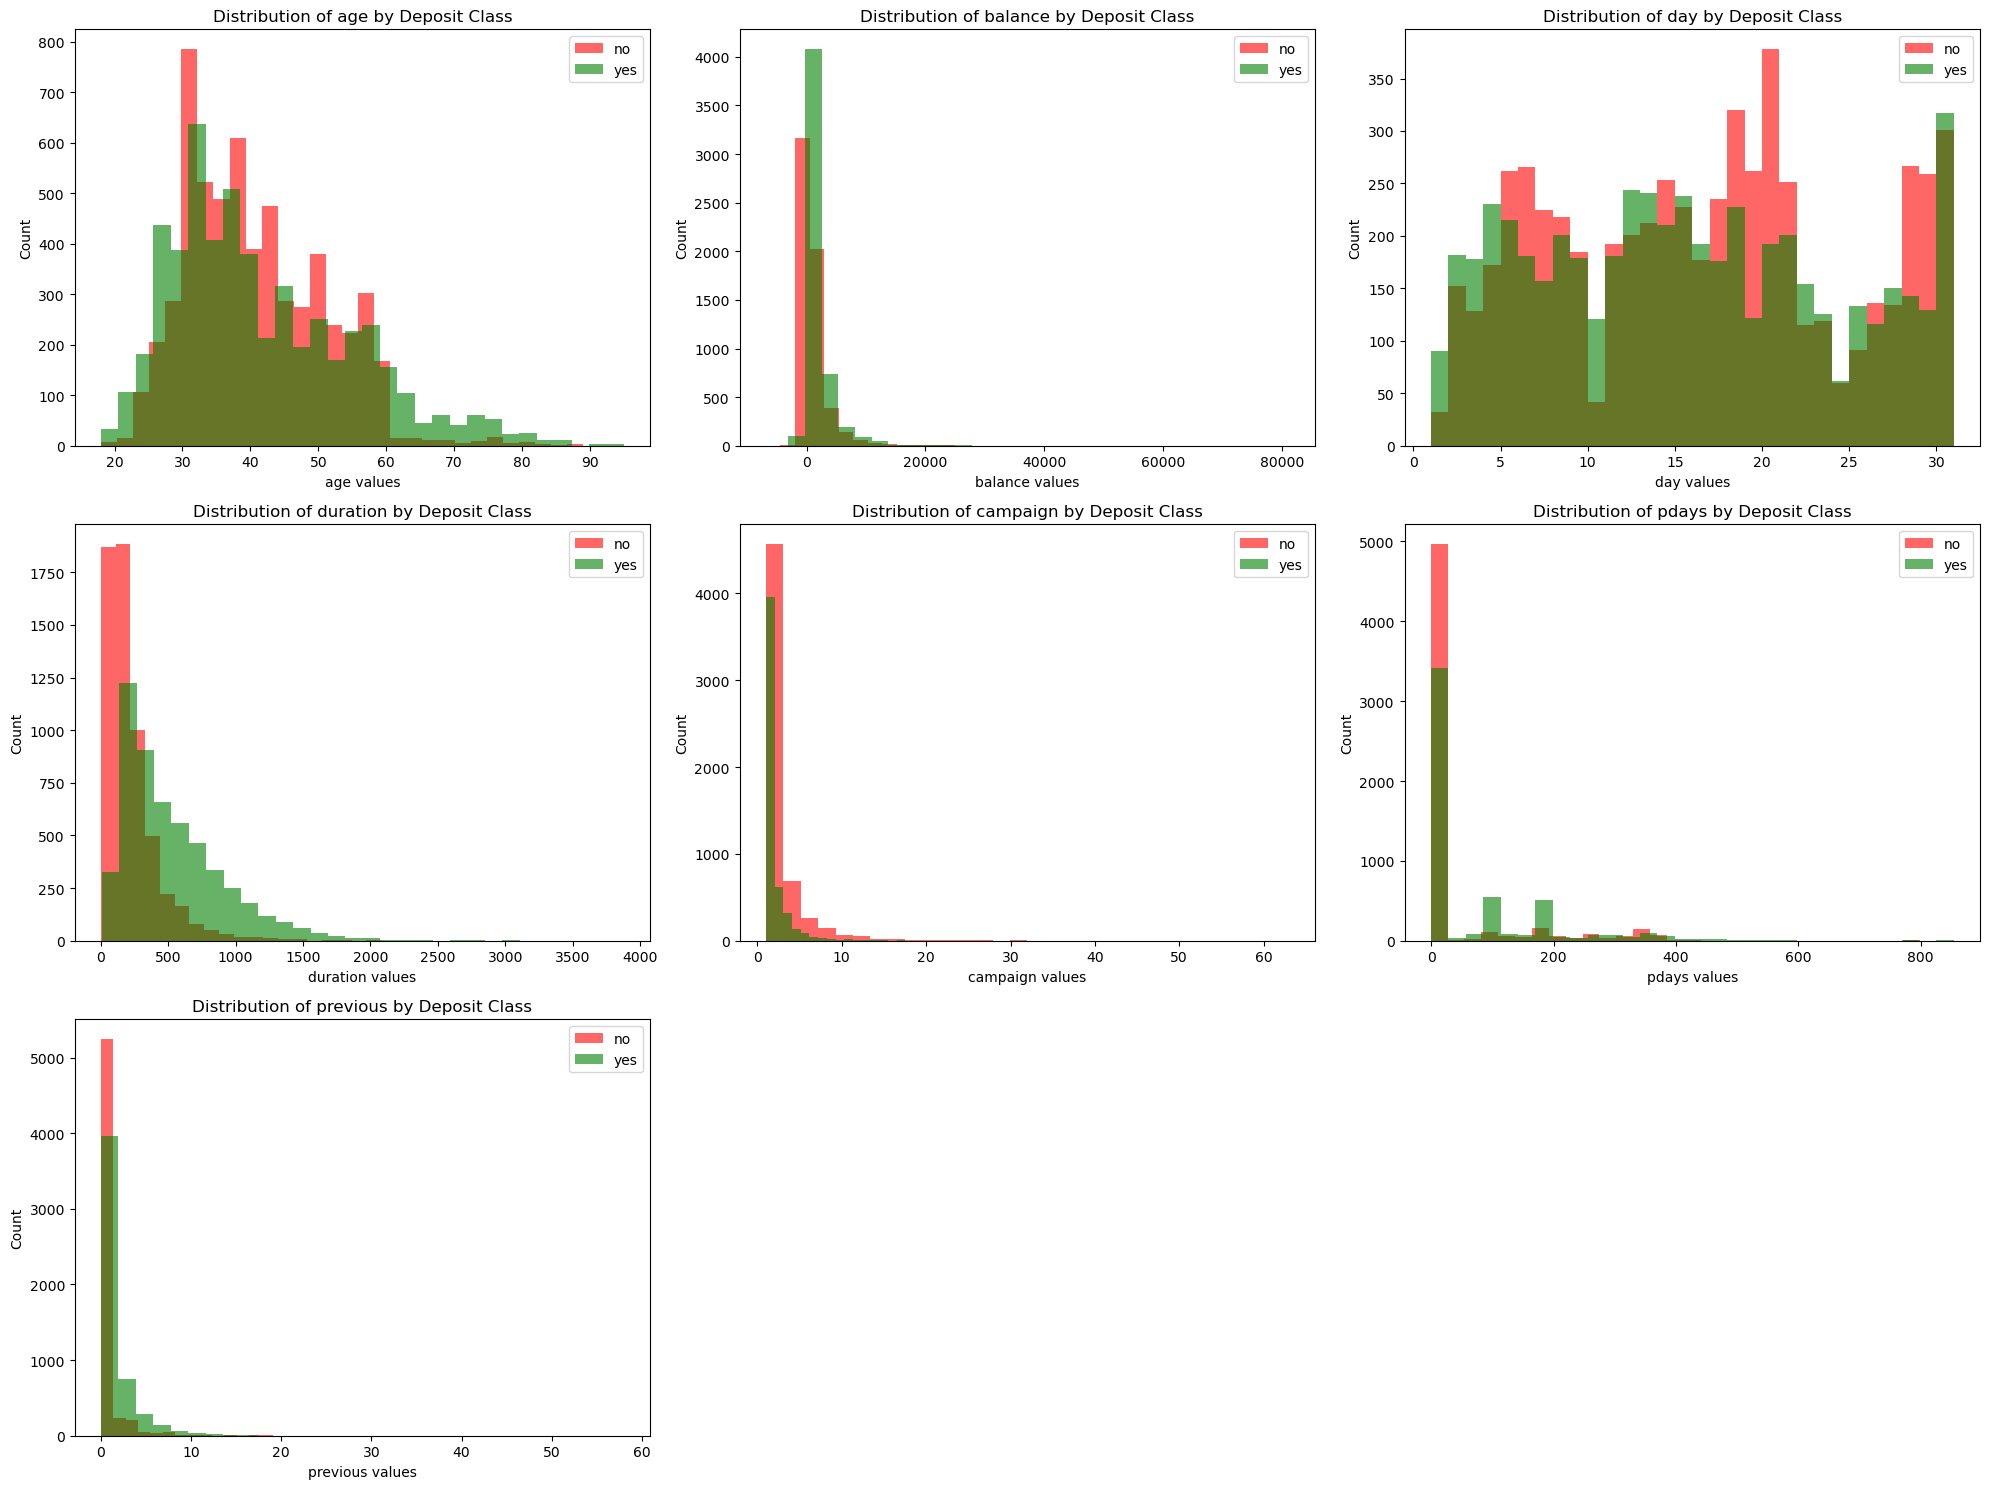

In [168]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

numerical_columns = df.columns[df.dtypes != 'object']
bins = 30

for i, feature in enumerate(numerical_columns):
  df[df['deposit'] == 'no'][feature].plot.hist(
    bins=bins, alpha=0.6, color='red', ax=axes[i], label='no'
  )
  df[df['deposit'] == 'yes'][feature].plot.hist(
    bins=bins, alpha=0.6, color='green', ax=axes[i], label='yes'
  )
  
  axes[i].set_title(f'Distribution of {feature} by Deposit Class')
  axes[i].set_xlabel(f'{feature} values')
  axes[i].set_ylabel('Count')
  axes[i].legend()

fig.delaxes(axes[7])
fig.delaxes(axes[8])
plt.tight_layout()

### Distribution of Ages by Occupation

The following graph displays the distribution of ages per occupation. As expected, the retired are the ones who have the highest median age while student are the lowest.

In [169]:
# Now let's see which occupation tended to have more balance in their accounts

suscribed_df = df.loc[df["deposit"] == "yes"]


occupations = df["job"].unique().tolist()

ages_by_job = {job: suscribed_df["age"].loc[suscribed_df["job"] == job].values for job in occupations}

occupations = ages_by_job.keys()
ages = ages_by_job.values()

colors = [
    'rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 
    'rgba(255, 65, 54, 0.5)',  'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
    'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)', 'rgba(174, 229, 56, 0.5)', 
    'rgba(229, 56, 56, 0.5)', 'rgba(54, 162, 235, 0.5)', 'rgba(255, 99, 132, 0.5)'
]

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(autorange=True,showgrid=True,zeroline=True,dtick=5,gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
        title='Age'
    ),
    margin=dict(l=40,r=30,b=80,t=100),
    plot_bgcolor='rgb(251,251,251)',
    paper_bgcolor='rgb(255,240,240)',
    showlegend=False
)


fig = go.Figure(data=traces, layout=layout)
iplot(fig)

# Based on Janio Martinez Bachmann's code

In [170]:
df_copy = df.copy()
df_copy["balance_status"] = np.nan
df_copy["balance_status"] = df_copy["balance_status"].astype(object)

lst = [df_copy]
for col in lst:
  col.loc[col["balance"] < 0, "balance_status"] = "negative"
  col.loc[(col["balance"] >= 0) & (col["balance"] <= 5000), "balance_status"] = "low"
  col.loc[(col["balance"] > 5000) & (col["balance"] <= 10000), "balance_status"] = "middle"
  col.loc[col["balance"] > 10000, "balance_status"] = "high"

negative = df_copy["balance"].loc[df_copy["balance_status"] == "negative"].values.tolist()
low = df_copy["balance"].loc[df_copy["balance_status"] == "low"].values.tolist()
middle = df_copy["balance"].loc[df_copy["balance_status"] == "middle"].values.tolist()
high = df_copy["balance"].loc[df_copy["balance_status"] == "high"].values.tolist()

# Get the average by occupation in each balance category
job_balance = df_copy.groupby(['job', 'balance_status'])['balance'].mean().reset_index()
balance_status_order = ['negative', 'low', 'middle', 'high']
job_balance['balance_status'] = pd.Categorical(job_balance['balance_status'], categories=balance_status_order, ordered=True)
job_balance = job_balance.sort_values(['job', 'balance_status'])

fig = px.bar(
    job_balance, 
    x='job', 
    y='balance',
    category_orders={"balance_status": balance_status_order},
    color='balance_status', 
    barmode='group',
    title='Mean Balance in Account by Job Occupation',
    labels={'balance': 'Mean Balance (€)', 'job': 'Job Occupation', 'balance_status': 'Balance Category'},
    color_discrete_map={
        'negative': 'rgb(246, 46, 46)', 
        'low': 'rgb(246, 97, 46)', 
        'middle': 'rgb(246, 179, 46)', 
        'high': 'rgb(46, 246, 78)'
    }
)

# Customize the layout
fig.update_layout(
  legend_title_text='Balance Category',
  xaxis_tickangle=-45,
  yaxis_title='Mean Balance (€)',
  font=dict(size=12),
  legend=dict(font=dict(size=12)),
)

fig.show()

# Adapted from Janio Martinez Bachmann's code

#### Clustering Marital Status and Education Level

The following graph exhibits the median balance by each group of marital status and education level. From the graph,the following conclusions can be drawn:
- **Divorce significantly impacts an individual's overall balance**, with divorced individuals typically exhibiting lower median balances compared to both their married and single counterparts (the exception being the divorced/primary and single/primary pair).
- An individual's **balance is strongly influenced by their education level**, with higher education levels correlating with higher median balances (the exception being divorced/primary cluster again).

Text(0.5, 1.0, 'Median Balance by Educational/Marital Group')

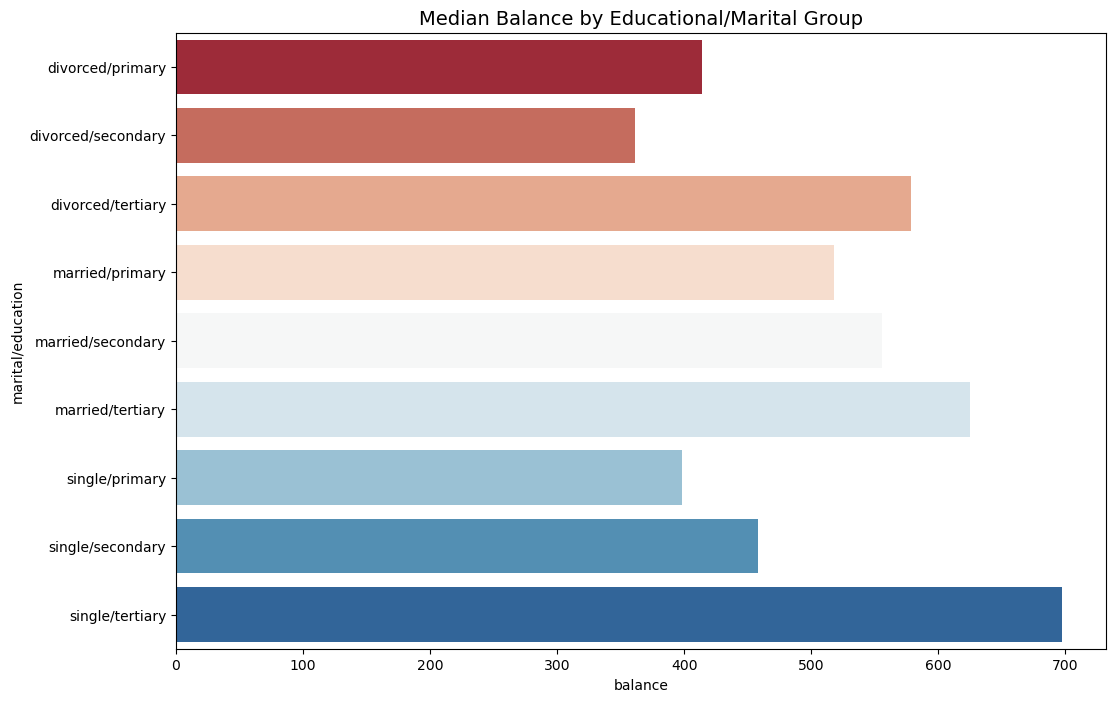

In [171]:
df_copy = df.copy()
df['marital/education'] = np.nan
df['marital/education'] = df['marital/education'].astype(object)
lst = [df_copy]
for col in lst:
  col.loc[(col['marital'] == 'single') & (df_copy['education'] == 'primary'), 'marital/education'] = 'single/primary'
  col.loc[(col['marital'] == 'married') & (df_copy['education'] == 'primary'), 'marital/education'] = 'married/primary'
  col.loc[(col['marital'] == 'divorced') & (df_copy['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
  col.loc[(col['marital'] == 'single') & (df_copy['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
  col.loc[(col['marital'] == 'married') & (df_copy['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
  col.loc[(col['marital'] == 'divorced') & (df_copy['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
  col.loc[(col['marital'] == 'single') & (df_copy['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
  col.loc[(col['marital'] == 'married') & (df_copy['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
  col.loc[(col['marital'] == 'divorced') & (df_copy['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'

education_groups = df_copy.groupby(['marital/education'], as_index=False)['balance'].median()
fig = plt.figure(figsize=(12,8))

sns.barplot(
  x="balance", y="marital/education", data=education_groups,
  label="Total", palette="RdBu", hue="marital/education"
)

plt.title('Median Balance by Educational/Marital Group', fontsize=14)

# Based on Janio Martinez Bachmann's code


The following graph illustrates the impact of personal loans on the median balances across various marital and educational clusters, comparing the balances for each cluster with and without a loan. From its analysis, it can be concluded that the **individual's balance is highly influenced by whether or not he/she has had a previous loan**, as the median balance for any given combination of marital status and education level is consistently lower for individuals who have had a loan.

In [172]:
loan_balance = df_copy.groupby(['marital/education', 'loan'], as_index=False)['balance'].median()
no_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'no'].values
has_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'yes'].values

labels = loan_balance['marital/education'].unique().tolist()
trace0 = go.Scatter(
  x=no_loan,
  y=labels,
  mode='markers',
  name='No Loan',
  marker=dict(
    color='rgb(175,238,238)',
    line=dict(
      color='rgb(0,139,139)',
      width=1,
    ),
    symbol='circle',
    size=16,
  )
)
trace1 = go.Scatter(
  x=has_loan,
  y=labels,
  mode='markers',
  name='Has a Previous Loan',
  marker=dict(
    color='rgb(250,128,114)',
    line=dict(
      color='rgb(178,34,34)',
      width=1,
    ),
    symbol='circle',
    size=16,
  )
)

data = [trace0, trace1]
layout = go.Layout(
  title="The Impact of Loans to Married/Educational Clusters",
  xaxis=dict(
    title='Balance (€)',
    showgrid=False,
    showline=True,
    linecolor='rgb(102, 102, 102)',
    tickfont=dict(
      color='rgb(102, 102, 102)',
    ),
    showticklabels=False,
    dtick=10,
    ticks='outside',
    tickcolor='rgb(102, 102, 102)',
  ),
  margin=dict(
    l=140,
    r=40,
    b=50,
    t=80
  ),
  legend=dict(
    font=dict(
        size=10,
    ),
    yanchor='middle',
    xanchor='right',
  ),
  width=1000,
  height=800,
  paper_bgcolor='rgb(255,250,250)',
  plot_bgcolor='rgb(255,255,255)',
  hovermode='closest',
)
layout.yaxis.title = 'Marital/Education'
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')

# Based on Janio Martinez Bachmann's code

From the plots below, we can see that the duration of the campaign has a significant impact on the subscription rate to term deposit. As the campaign duration increases, the subscription rate steadily improves. 
However, after a certain treshold (around 900 seconds), the subscription rate begins to stabilize, reaching a peak of around 80-90%. This indicates that while longer campaign durations are beneficial, 
excessively long interactions may not produce significant additional gains.

On the other hand, the number of contacts has a negative correlation with subscription rates. It decreases linearly as the number of contacts increases.

The account balance also has a significant impact on the subscription rate. The percentage of subscriptions increases rapidly to around 60% as the account balance increases from 0 to 4000 euros.
After this point, the subscription rate starts decreasing, meaning that very high account balances do not necessarily lead to higher subscription rates.

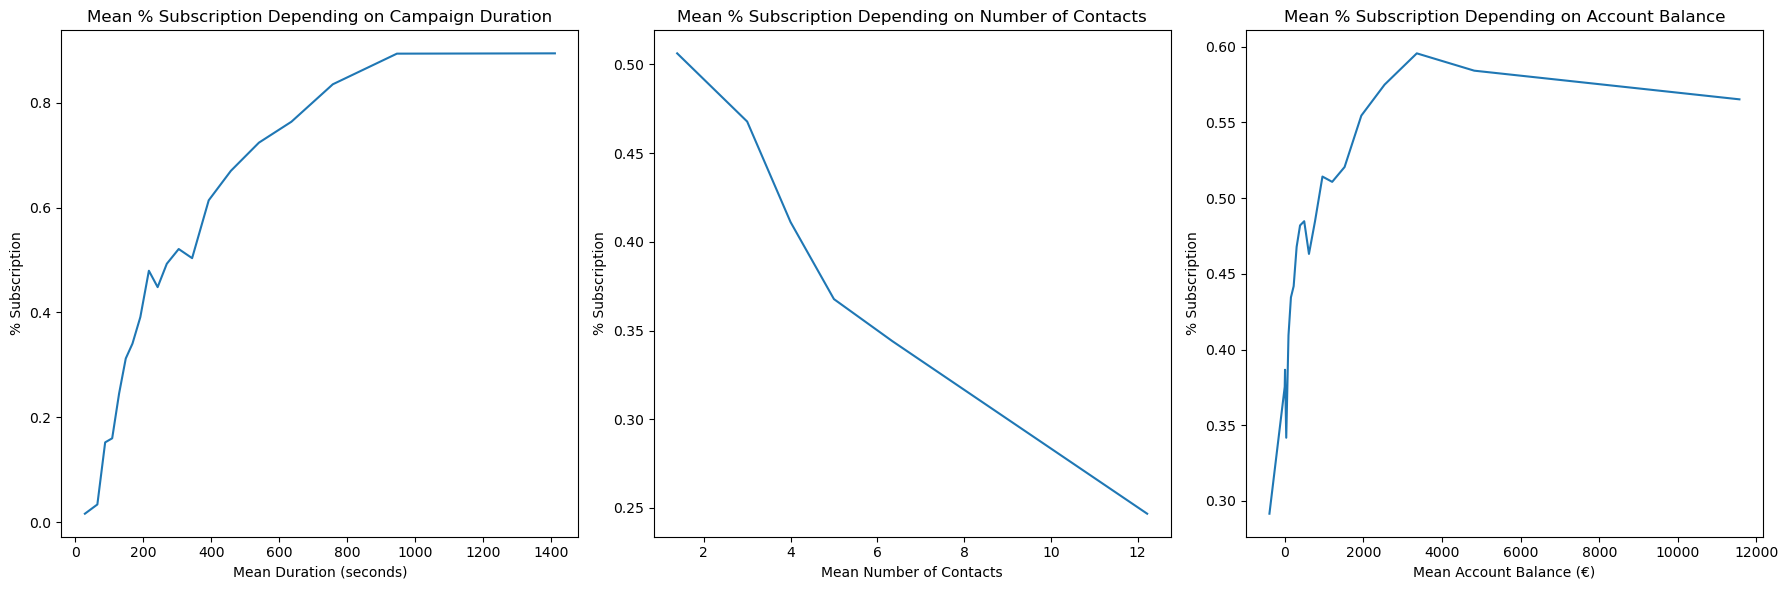

In [173]:
df_copy = df.copy()

# Convert deposit outcome to a binary column if not already
df_copy['deposit_bool'] = (df_copy['deposit'] == 'yes').astype(int)

# Create duration buckets
df_copy['duration_buckets'] = pd.qcut(df_copy['duration'], 20, labels=False, duplicates='drop')

# Calculate mean subscription rate and mean duration per bucket
mean_duration = df_copy.groupby(['duration_buckets'])['deposit_bool'].mean()
mean_duration_values = df_copy.groupby(['duration_buckets'])['duration'].mean()

# Create campaign buckets
df_copy['campaign_buckets'] = pd.qcut(df_copy['campaign'], 20, labels=False, duplicates='drop')

# Calculate mean subscription rate and mean number of contacts per bucket
mean_campaign = df_copy.groupby(['campaign_buckets'])['deposit_bool'].mean()
mean_campaign_values = df_copy.groupby(['campaign_buckets'])['campaign'].mean()

# Create balance buckets
df_copy['balance_buckets'] = pd.qcut(df_copy['balance'], 20, labels=False, duplicates='drop')

# Calculate mean subscription rate and mean account balance per bucket
mean_balance = df_copy.groupby(['balance_buckets'])['deposit_bool'].mean()
mean_balance_values = df_copy.groupby(['balance_buckets'])['balance'].mean()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Mean % Subscription Depending on Campaign Duration
axes[0].plot(mean_duration_values, mean_duration.values)
axes[0].set_title('Mean % Subscription Depending on Campaign Duration')
axes[0].set_xlabel('Mean Duration (seconds)')
axes[0].set_ylabel('% Subscription')

# Plot 2: Mean % Subscription Depending on Number of Contacts
axes[1].plot(mean_campaign_values, mean_campaign.values)
axes[1].set_title('Mean % Subscription Depending on Number of Contacts')
axes[1].set_xlabel('Mean Number of Contacts')
axes[1].set_ylabel('% Subscription')

# Plot 3: Mean % Subscription Depending on Account Balance
axes[2].plot(mean_balance_values, mean_balance.values)
axes[2].set_title('Mean % Subscription Depending on Account Balance')
axes[2].set_xlabel('Mean Account Balance (€)')
axes[2].set_ylabel('% Subscription')

# Adjust layout and show
plt.tight_layout()
plt.show()

The correlation matrix shows that the most significant positive correlation with the target variable is the duration of the call with a value of 0.45. 
This aligns with previous observations that campaign duration plays a crucial role in influencing customer decisions.

There is also a strong correlation (0.51) between pdays (number of days since the customer was last contacted) and previous (number of contacts performed before the campaign). 

This suggests that the more times a customer has been contacted, the shorter the interval between their interactions.

Most other variables, such as age, day, and pdays, show little to no correlation with the deposit outcome, indicating they may have minimal predictive value for determining subscription probability.

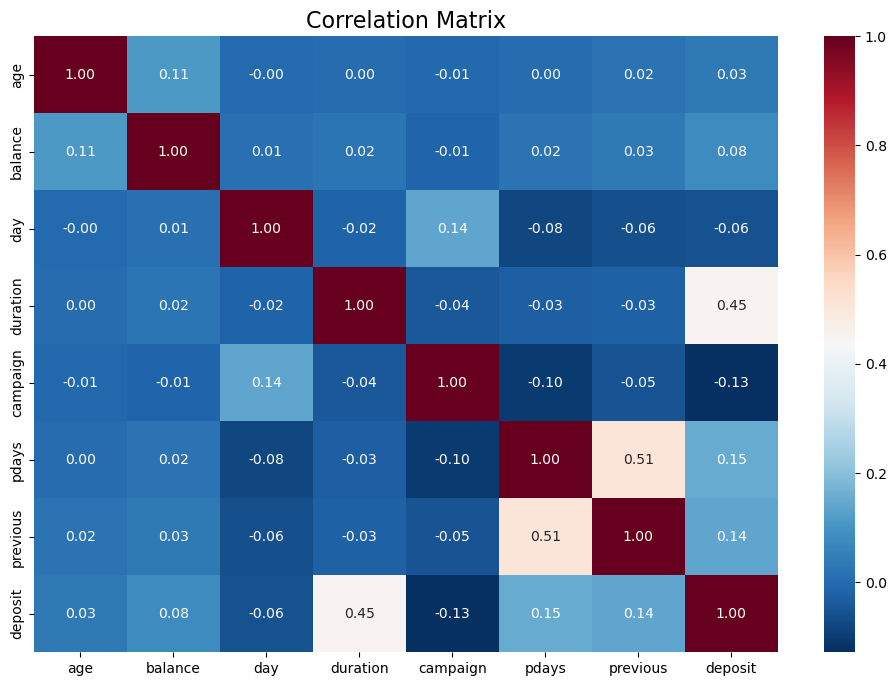

In [174]:
fig = plt.figure(figsize=(12,8))
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])

# Separate both dataframes into 
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r", annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix", fontsize=16)
plt.show()

# From Janio Martinez Bachmann's code